## 1.2 Dataset

In [15]:
# !pip install glob2

In [16]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import image_dataset_from_directory
import numpy as np
# (x_train, _), (x_test, _) = tf.keras.utils.image_dataset_from_directory(

# Configurations principales de nos modèles
IMG_SIZE          = 180                # taille coté final d'une image en pixel (ici 28x28)
NB_EPOCHS_DENOISE = 10               # nombre epoch alogithme debruiter
BATCH_SIZE        = 8             # taille batch de traitement
SAV_MODEL_DENOISE = "denoiser.h5"     # sauvegarde du modele de debruitage

def process(image):
    image = tf.cast(image/255. ,tf.float32)
    return image



In [17]:

(train),(test) = image_dataset_from_directory(
    './photoOnly',
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    # label_mode="categorical",
    label_mode=None,
    shuffle=False,
    validation_split=0.2,
    subset="both",
    seed=123,
    color_mode="rgb"
    )


(noised_train ),(noised_test) = image_dataset_from_directory(
    './noised_livrable_1',
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    # label_mode="categorical",
    label_mode=None,
    shuffle=False,
    validation_split=0.2,
    subset="both",
    seed=123,
    color_mode="rgb",
    # follow_links=True
    )

# train = train.map(process)
# test = test.map(process)

# noised_train = noised_train.map(process)
# noised_test = noised_test.map(process)


# train_dataset = tf.data.Dataset.zip((noised_train, train))
# test_dataset = tf.data.Dataset.zip((noised_test, test))


Found 9993 files belonging to 1 classes.
Using 7995 files for training.
Using 1998 files for validation.
Found 20642 files belonging to 1 classes.
Using 16514 files for training.
Using 4128 files for validation.


In [18]:
%ls ./photoOnly/Photo

photo_0001.jpg*   photo_2502.jpg*  photo_5001.jpg*  photo_7502.jpg*
photo_0002.jpg*   photo_2503.jpg*  photo_5002.jpg*  photo_7503.jpg*
photo_0003.jpg*   photo_2504.jpg*  photo_5003.jpg*  photo_7504.jpg*
photo_0004.jpg*   photo_2505.jpg*  photo_5004.jpg*  photo_7505.jpg*
photo_0005.jpg*   photo_2506.jpg*  photo_5005.jpg*  photo_7506.jpg*
photo_0006.jpg*   photo_2507.jpg*  photo_5006.jpg*  photo_7507.jpg*
photo_0007.jpg*   photo_2508.jpg*  photo_5007.jpg*  photo_7508.jpg*
photo_0008.jpg*   photo_2509.jpg*  photo_5008.jpg*  photo_7509.jpg*
photo_0009.jpg*   photo_2510.jpg*  photo_5009.jpg*  photo_7510.jpg*
photo_0010.jpg*   photo_2511.jpg*  photo_5010.jpg*  photo_7511.jpg*
photo_0011.jpg*   photo_2512.jpg*  photo_5011.jpg*  photo_7512.jpg*
photo_0012.jpg*   photo_2513.jpg*  photo_5012.jpg*  photo_7513.jpg*
photo_0013.jpg*   photo_2514.jpg*  photo_5013.jpg*  photo_7514.jpg*
photo_0014.jpg*   photo_2515.jpg*  photo_5014.jpg*  photo_7515.jpg*
photo_0015.jpg*   photo_2516.jpg*  photo_5015.jp

In [19]:

import os
import tensorflow as tf
# os.chdir(r'/tf')
from glob2 import glob

x_files = glob('photoOnly/Photo/*.jpg')
y_files = glob('noised_livrable_1/Photo/*.jpg')


# print(x_files)

files_ds = tf.data.Dataset.from_tensor_slices((x_files, y_files))

def process_img(file_path):
   img = tf.io.read_file(file_path)
   img = tf.image.decode_jpeg(img, channels=3)
   img = tf.image.resize(img, size=(180, 180))
   
   # Convert dtype to float16 without scaling the values
   img = tf.cast(img, tf.float16)
   
   # Adjusting the color range from [0, 255] to [0, 1]
   img = img / 255.0
   
   return img




files_ds = files_ds.map(lambda x, y: (process_img(x), process_img(y)))
train_ds = files_ds.take(5000).batch(BATCH_SIZE)
test_ds = files_ds.skip(5000).batch(BATCH_SIZE)


original, target = next(iter(files_ds))

Commençons par écrire une fonction qui permet de visualiser $n$ premiers enregistrements en noir et blanc. 

In [20]:
import matplotlib.pyplot as plt

def display_image(X, n):
    plt.figure(figsize=(8, 2))
    # print(X.shape)
    for i in range(n):
    #A COMPLETER
        # print(X[i].shape)
        ax = plt.subplot(1, n, i + 1)
                         #A COMPLETER
        plt.imshow(X[i])
                   #A COMPLETER
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

Voyons ce que ça donne :

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


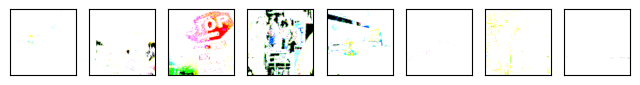

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


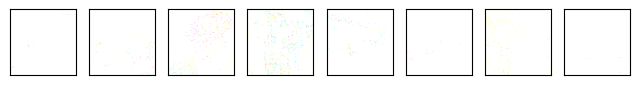

In [21]:
display_image(list(train.take(1).as_numpy_iterator())[0], n=BATCH_SIZE)
display_image(list(noised_train.take(1).as_numpy_iterator())[0], n=BATCH_SIZE)

# AutoEncoder

In [28]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D


# The encoding process
input_img = Input(shape=(IMG_SIZE, IMG_SIZE, 3))  # adapt this if using `channels_first` image data format

# Encoding #

# Conv1 #
x = Conv2D(8, (3, 3), activation='relu', padding='same')(input_img)  # 16 filters, 3x3 kernel
x = MaxPooling2D((2, 2), padding='same')(x)  # Pooling with 2x2 grid

# Conv2 #
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)  # 8 filters, 3x3 kernel
encoded = MaxPooling2D((2, 2), padding='same')(x)  # Pooling with 2x2 grid


# Note:
# padding is a hyper-arameter for either 'valid' or 'same'. 
# "valid" means "no padding". 
# "same" results in padding the input such that the output has the same length as the original input.

###### Décodeur

Passon au décodeur. Écrivez un code qui permet de décoder une image encodée selon l'architecture du réseau de neurones décrite auparavent. 

In [29]:
x = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)  # 8 filters, 3x3 kernel
x = UpSampling2D((2, 2))(x)  # Upsampling to 2x2 grid
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)  # 16 filters, 3x3 kernel
x = UpSampling2D((2, 2))(x)  # Upsampling to 2x2 grid
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)  # 1 filter to match input, 3x3 kernel


In [30]:
from tensorflow.keras.models import Model

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy',run_eagerly=True)
autoencoder.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 conv2d_5 (Conv2D)           (None, 180, 180, 8)       224       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 90, 90, 8)         0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 90, 90, 16)        1168      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 45, 45, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 45, 45, 16)        2320

###### Entrainement de l'auto-encodeur

On va ensuite entraîner l'auto-encodeur en utilisant les constantes définit au début (`NB_EPOCHS_DENOISE,BATCH_SIZE`)

In [31]:
%reload_ext tensorboard

Affichez maintenant la courbe d'apprentissage. Que pensez-vous des performances du modèle ?

In [32]:
autoencoder.fit(
    # train_dataset,
    train_ds,
    epochs=NB_EPOCHS_DENOISE,
    shuffle=True,
    # validation_data=test_dataset,
    # callbacks=[tf.keras.callbacks.TensorBoard(log_dir='./tmp/autoencoder')]
    )


Epoch 1/10


2023-10-06 07:10:13.516033: W tensorflow/tsl/framework/bfc_allocator.cc:485] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.97MiB (rounded to 3110400)requested by op Conv2D
If the cause is memory fragmentation maybe the environment variable 'TF_GPU_ALLOCATOR=cuda_malloc_async' will improve the situation. 
Current allocation summary follows.
Current allocation summary follows.
2023-10-06 07:10:13.516065: I tensorflow/tsl/framework/bfc_allocator.cc:1039] BFCAllocator dump for GPU_0_bfc
2023-10-06 07:10:13.516073: I tensorflow/tsl/framework/bfc_allocator.cc:1046] Bin (256): 	Total Chunks: 48, Chunks in use: 47. 12.0KiB allocated for chunks. 11.8KiB in use in bin. 949B client-requested in use in bin.
2023-10-06 07:10:13.516093: I tensorflow/tsl/framework/bfc_allocator.cc:1046] Bin (512): 	Total Chunks: 0, Chunks in use: 0. 0B allocated for chunks. 0B in use in bin. 0B client-requested in use in bin.
2023-10-06 07:10:13.516099: I tensorflow/tsl/framework/bfc_allocator.cc:1046]

ResourceExhaustedError: Exception encountered when calling layer 'conv2d_9' (type Conv2D).

{{function_node __wrapped__Conv2D_device_/job:localhost/replica:0/task:0/device:GPU:0}} OOM when allocating tensor with shape[8,3,180,180] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc [Op:Conv2D] name: 

Call arguments received by layer 'conv2d_9' (type Conv2D):
  • inputs=tf.Tensor(shape=(8, 180, 180, 8), dtype=float32)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


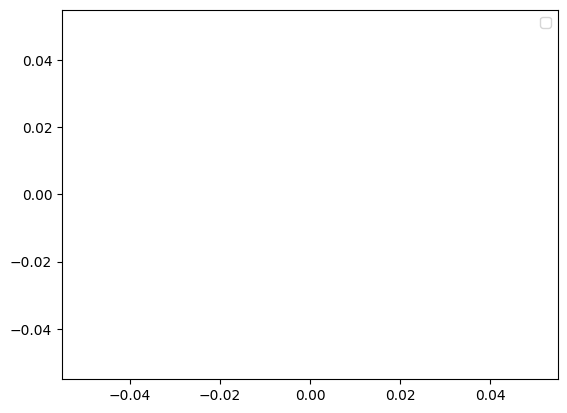

In [ ]:
# Visualisation des pertes d'apprentissage (Train) et de validation (Test)
plt.plot( #A COMPLETER
         label='train')
plt.plot( #A COMPLETER
         label='test')
plt.legend()

Que pensez-vous des performances du modèle ?
<em>À COMPLÉTER</em>


# 1.4 Sauvgarde de l'auto-encodeur

L'entrainement de l'auto-encodeur sans utilisation de puissance de calcul (GPU) peut prendre beaucoup de temps. Usuellement, nous sauvegardons le modèle entraîné en local ou sur un serveur distant pour l'utiliser ultérieurement afin de traiter les nouvelles données (d'ailleurs, vous verrez une utilisation avancée de cette technique, le transfert learning, dès la semaine prochaine).
Pour sauvegarder le modèle `autoencoder`, utiliser la méthode `save`.

In [ ]:
# save the model
#A COMPLETER


In [ ]:
decoded_imgs = #A COMPLETER


SyntaxError: invalid syntax (3654316236.py, line 1)